In [1]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("indian_liver_patient.csv");display(df.head(n=10))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [2]:
print(f"Anzahl der Merkmale: {len(df.columns)}")

Anzahl der Merkmale: 11


In [3]:
print(f"Einzigartige Werte der Spalte \"Gender\": {df['Gender'].unique()}")

Einzigartige Werte der Spalte "Gender": ['Female' 'Male']


In [4]:
display(df.describe())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
print(df["Gender"].dtype, df["Age"].dtype, df["Total_Protiens"].dtype)


object int64 float64


In [6]:
print(df.count())

Age                           583
Gender                        583
Total_Bilirubin               583
Direct_Bilirubin              583
Alkaline_Phosphotase          583
Alamine_Aminotransferase      583
Aspartate_Aminotransferase    583
Total_Protiens                583
Albumin                       583
Albumin_and_Globulin_Ratio    579
Dataset                       583
dtype: int64


In [7]:
df[df["Albumin_and_Globulin_Ratio"].isnull()].index

Int64Index([209, 241, 253, 312], dtype='int64')

In [8]:
df = df.drop(df.index[[209, 241, 253, 312]])
print(df.count())

Age                           579
Gender                        579
Total_Bilirubin               579
Direct_Bilirubin              579
Alkaline_Phosphotase          579
Alamine_Aminotransferase      579
Aspartate_Aminotransferase    579
Total_Protiens                579
Albumin                       579
Albumin_and_Globulin_Ratio    579
Dataset                       579
dtype: int64


In [9]:
# One-Hot-Kodierung
df = pd.get_dummies(df)
display(df.head())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [16]:
y = df["Dataset"]
X = df.drop("Dataset", axis=1)
display(y.shape, X.shape)

(579,)

(579, 11)

In [18]:
# Skalierung und Teilung
from sklearn.preprocessing import StandardScaler
# StandardScaler
scaler = StandardScaler()
X_skaliert = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_skaliert, y, test_size=0.3, random_state=12, stratify=y)


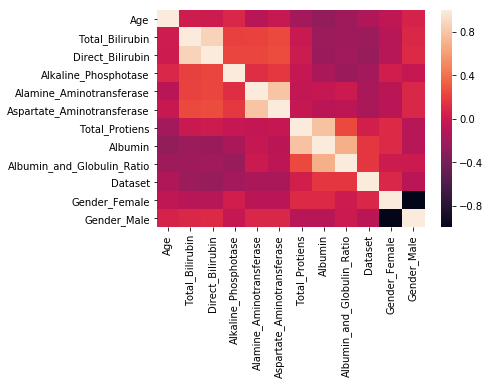

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr)

plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()

model1.fit(X_train, y_train)
print(f"Train RFC: {model1.score(X_train, y_train)}")
print(f"Test RFC: {model1.score(X_test, y_test)}")

from sklearn.svm import SVC
model2 = SVC(kernel="rbf")

model2.fit(X_train, y_train)
print(f"Train SVC: {model2.score(X_train, y_train)}")
print(f"Test SVC: {model2.score(X_test, y_test)}")

from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()

model3.fit(X_train, y_train)
print(f"Train LogReg: {model3.score(X_train, y_train)}")
print(f"Test LogReg: {model3.score(X_test, y_test)}")

Train RFC: 0.9679012345679012
Test RFC: 0.6954022988505747
Train SVC: 0.7160493827160493
Test SVC: 0.7126436781609196
Train LogReg: 0.7358024691358025
Test LogReg: 0.735632183908046
